In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames 


# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [4]:
df_countries = pd.read_csv("data/usable/global_energy_consumption.csv", index_col = 0)

In [5]:
df_countries.head()

,Entity,Code,Year,"Other renewables (TWh, substituted energy)","Biofuels (TWh, substituted energy)","Solar (TWh, substituted energy)","Wind (TWh, substituted energy)","Hydropower (TWh, substituted energy)","Nuclear (TWh, substituted energy)","Gas (TWh, substituted energy)","Oil (TWh, substituted energy)","Coal (TWh, substituted energy)","Traditional biomass (TWh, substituted energy)"
42,World,OWID_WRL,1990,361.21370,106.569110,1.148346,10.741176,6383.0127,5676.7207,19481.150,37608.000,25916.205,11111
43,World,OWID_WRL,1991,376.84134,110.646820,1.494234,12.082573,6530.6340,5948.3110,19972.836,37688.625,25667.406,11243
44,World,OWID_WRL,1992,404.81308,108.705635,1.379965,13.994874,6529.9610,5993.4634,20063.482,38192.870,25567.281,11376
45,World,OWID_WRL,1993,418.26727,114.340050,1.646089,16.867165,6923.2563,6199.8696,20265.480,38024.570,25689.945,11511
46,World,OWID_WRL,1994,434.68140,124.101776,1.765272,21.088448,6966.3850,6316.2480,20389.613,38852.320,25791.270,11647


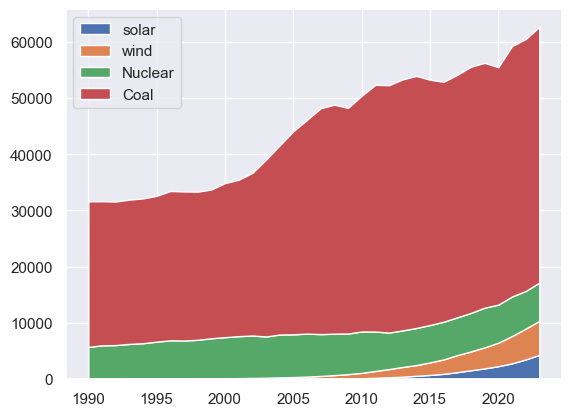

In [7]:
# set seaborn style
sns.set_theme()
 
# Data
x = df_countries['Year']
y = [df_countries['Solar (TWh, substituted energy)'], df_countries['Wind (TWh, substituted energy)'], df_countries['Nuclear (TWh, substituted energy)'], df_countries['Coal (TWh, substituted energy)']]
 
# Plot
plt.stackplot(x,y, labels=['solar','wind','Nuclear', 'Coal'])
plt.legend(loc='upper left')
plt.show()

In [10]:
df_solar_consump = pd.read_csv('data/usable/territorial_solar_consumption.csv', index_col = 0)

In [11]:
df_solar_consump.head()

,Entity,Code,Year,Electricity from solar (TWh),Electricity from solar (GWh)
0,Afghanistan,AFG,2000,0.0,0.0
1,Afghanistan,AFG,2001,0.0,0.0
2,Afghanistan,AFG,2002,0.0,0.0
3,Afghanistan,AFG,2003,0.0,0.0
4,Afghanistan,AFG,2004,0.0,0.0


In [16]:
df_solar_consump.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8683 entries, 0 to 8682
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Entity                        8683 non-null   object 
 1   Code                          7227 non-null   object 
 2   Year                          8683 non-null   int64  
 3   Electricity from solar (TWh)  8683 non-null   float64
 4   Electricity from solar (GWh)  8683 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 407.0+ KB


In [17]:
df_solar_consump['Year'] = df_solar_consump['Year'].apply(lambda x: str(x))

In [18]:
df_solar_consump.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8683 entries, 0 to 8682
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Entity                        8683 non-null   object 
 1   Code                          7227 non-null   object 
 2   Year                          8683 non-null   object 
 3   Electricity from solar (TWh)  8683 non-null   float64
 4   Electricity from solar (GWh)  8683 non-null   float64
dtypes: float64(2), object(3)
memory usage: 407.0+ KB


In [27]:
df_solar_consump_europe = df_solar_consump[df_solar_consump['Entity'] == 'Europe']

In [28]:
df_solar_consump_africa = df_solar_consump[df_solar_consump['Entity'] == 'Africa']

In [29]:
df_solar_consump_usa = df_solar_consump[df_solar_consump['Entity'] == 'North America']

In [35]:
df_solar_consump_south_america = df_solar_consump[df_solar_consump['Entity'] == 'South America']

In [36]:
df_solar_consump_asia = df_solar_consump[df_solar_consump['Entity'] == 'Asia']

''

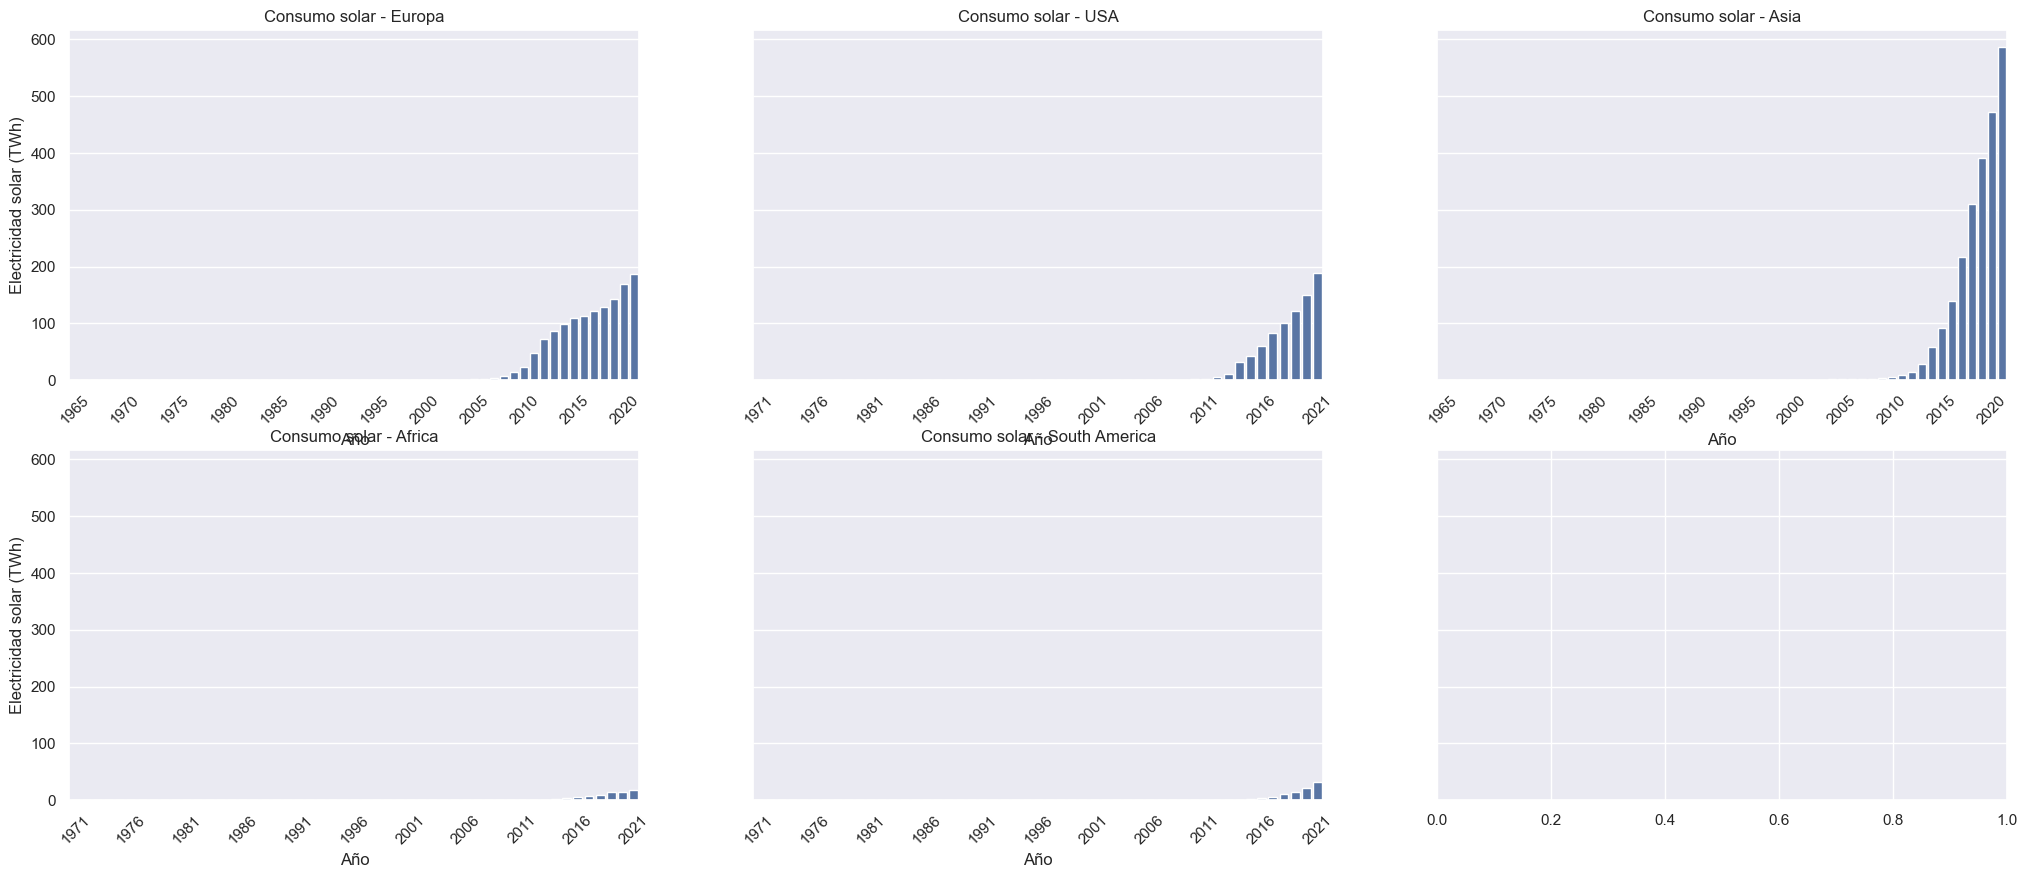

In [64]:
fig, axes = plt.subplots(2, 3, figsize=(25, 10), sharey=True)  # Compartimos eje Y para comparar mejor


#EUROPE
sns.barplot(y = "Electricity from solar (TWh)", 
            x = "Year",
            data = df_solar_consump_europe,
            ax = axes[0,0])

# Mostrar solo ciertos años, por ejemplo, cada 3
years_europe = df_solar_consump_europe["Year"].unique()
axes[0,0].set_xticks(years_europe[::5])
axes[0,0].set_xticklabels(years_europe[::5], rotation=45)
axes[0,0].set_title("Consumo solar - Europa")
axes[0,0].set_xlabel("Año")
axes[0,0].set_ylabel("Electricidad solar (TWh)")

#USA
sns.barplot(y = "Electricity from solar (TWh)", 
            x = "Year",
            data = df_solar_consump_usa,
            ax = axes[0,1])

years_usa = df_solar_consump_usa["Year"].unique()
axes[0,1].set_xticks(years_usa[::5])
axes[0,1].set_xticklabels(years_usa[::5], rotation=45)
axes[0,1].set_title("Consumo solar - USA")
axes[0,1].set_xlabel("Año")
axes[0,1].set_ylabel("Electricidad solar (TWh)")


#ASIA
sns.barplot(y = "Electricity from solar (TWh)", 
            x = "Year",
            data = df_solar_consump_asia,
            ax = axes[0,2])

years_asia = df_solar_consump_asia["Year"].unique()
axes[0,2].set_xticks(years_asia[::5])
axes[0,2].set_xticklabels(years_asia[::5], rotation=45)
axes[0,2].set_title("Consumo solar - Asia")
axes[0,2].set_xlabel("Año")
axes[0,2].set_ylabel("Electricidad solar (TWh)")

#South_america
sns.barplot(y = "Electricity from solar (TWh)", 
            x = "Year",
            data = df_solar_consump_africa,
            ax = axes[1,0])

years_africa = df_solar_consump_africa["Year"].unique()
axes[1,0].set_xticks(years_africa[::5])
axes[1,0].set_xticklabels(years_africa[::5], rotation=45)
axes[1,0].set_title("Consumo solar - Africa")
axes[1,0].set_xlabel("Año")
axes[1,0].set_ylabel("Electricidad solar (TWh)")


#South_america
sns.barplot(y = "Electricity from solar (TWh)", 
            x = "Year",
            data = df_solar_consump_south_america,
            ax = axes[1,1])

years_south_america = df_solar_consump_south_america["Year"].unique()
axes[1,1].set_xticks(years_south_america[::5])
axes[1,1].set_xticklabels(years_south_america[::5], rotation=45)
axes[1,1].set_title("Consumo solar - South America")
axes[1,1].set_xlabel("Año")
axes[1,1].set_ylabel("Electricidad solar (TWh)")
;

In [43]:
df_generation_wind = pd.read_csv('data/usable/territorial_wind_generation.csv', index_col = 0)

In [44]:
df_generation_wind.head(1)

,Entity,Code,Year,Electricity from wind (TWh)
0,Afghanistan,AFG,2000,0.0


In [82]:
df_generation_wind['Year'] = df_generation_wind['Year'].apply(lambda x: str(x))

In [85]:
df_generation_wind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8676 entries, 0 to 8675
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Entity                       8676 non-null   object 
 1   Code                         7217 non-null   object 
 2   Year                         8676 non-null   object 
 3   Electricity from wind (TWh)  8676 non-null   float64
dtypes: float64(1), object(3)
memory usage: 338.9+ KB


In [86]:
df_generation_wind_europe = df_generation_wind[df_generation_wind['Entity'] == 'Europe']

In [87]:
df_generation_wind_africa = df_generation_wind[df_generation_wind['Entity'] == 'Africa']

In [88]:
df_generation_wind_usa = df_generation_wind[df_generation_wind['Entity'] == 'North America']

In [89]:
df_generation_wind_south_am = df_generation_wind[df_generation_wind['Entity'] == 'South America']

In [90]:
df_generation_wind_asia = df_generation_wind[df_generation_wind['Entity'] == 'Asia']

''

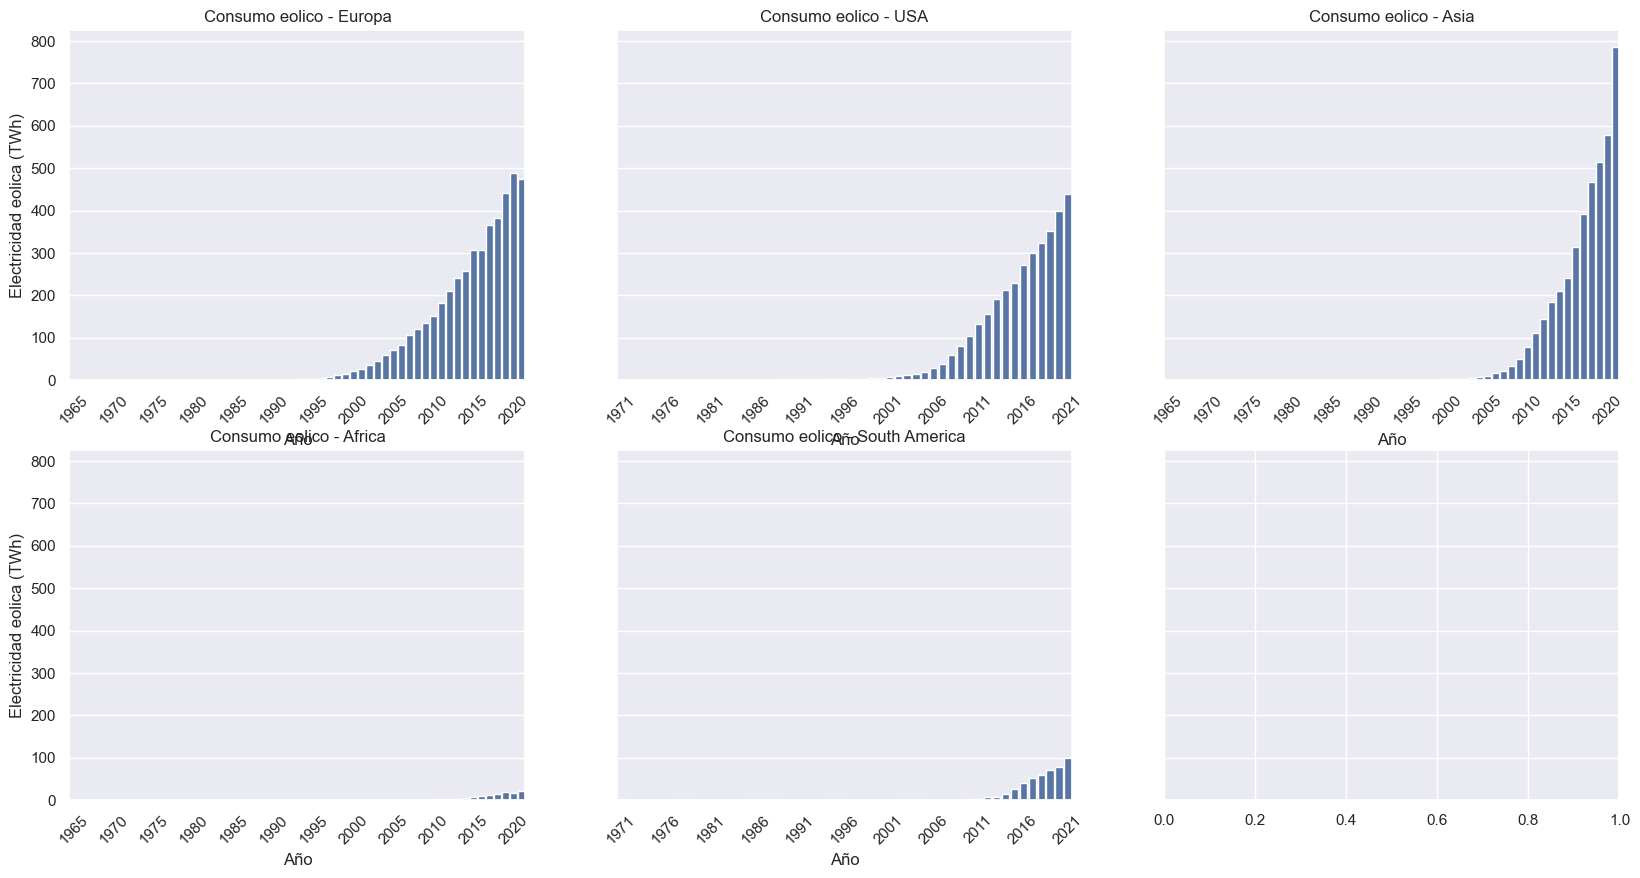

In [91]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10), sharey=True)  # Compartimos eje Y para comparar mejor


#EUROPE
sns.barplot(y = "Electricity from wind (TWh)", 
            x = "Year",
            data = df_generation_wind_europe,
            ax = axes[0,0])

# Mostrar solo ciertos años, por ejemplo, cada 3
years_europe = sorted(df_generation_wind_europe["Year"].unique())
axes[0,0].set_xticks(years_europe[::5])
axes[0,0].set_xticklabels(years_europe[::5], rotation=45)
axes[0,0].set_title("Consumo eolico - Europa")
axes[0,0].set_xlabel("Año")
axes[0,0].set_ylabel("Electricidad eolica (TWh)")

#USA
sns.barplot(y = "Electricity from wind (TWh)", 
            x = "Year",
            data = df_generation_wind_usa,
            ax = axes[0,1])

years_usa = sorted(df_generation_wind_usa["Year"].unique())
axes[0,1].set_xticks(years_usa[::5])
axes[0,1].set_xticklabels(years_usa[::5], rotation=45)
axes[0,1].set_title("Consumo eolico - USA")
axes[0,1].set_xlabel("Año")
axes[0,1].set_ylabel("Electricidad eolica (TWh)")


#ASIA
sns.barplot(y = "Electricity from wind (TWh)", 
            x = "Year",
            data = df_generation_wind_asia,
            ax = axes[0,2])

years_asia = sorted(df_generation_wind_asia["Year"].unique())
axes[0,2].set_xticks(years_asia[::5])
axes[0,2].set_xticklabels(years_asia[::5], rotation=45)
axes[0,2].set_title("Consumo eolico - Asia")
axes[0,2].set_xlabel("Año")
axes[0,2].set_ylabel("Electricidad eolica (TWh)")

#South_america
sns.barplot(y = "Electricity from wind (TWh)", 
            x = "Year",
            data = df_generation_wind_africa,
            ax = axes[1,0])

years_africa = sorted(df_generation_wind_africa["Year"].unique())
axes[1,0].set_xticks(years_africa[::5])
axes[1,0].set_xticklabels(years_africa[::5], rotation=45)
axes[1,0].set_title("Consumo eolico - Africa")
axes[1,0].set_xlabel("Año")
axes[1,0].set_ylabel("Electricidad eolica (TWh)")


#South_america
sns.barplot(y = "Electricity from wind (TWh)", 
            x = "Year",
            data = df_generation_wind_south_am,
            ax = axes[1,1])

years_south_america = sorted(df_generation_wind_south_am["Year"].unique())
axes[1,1].set_xticks(years_south_america[::5])
axes[1,1].set_xticklabels(years_south_america[::5], rotation=45)
axes[1,1].set_title("Consumo eolico - South America")
axes[1,1].set_xlabel("Año")
axes[1,1].set_ylabel("Electricidad eolica (TWh)")

;